### https://imgaug.readthedocs.io/en/latest/source/examples_bounding_boxes.html

In [1]:
from imgaug import augmenters as iaa

In [2]:
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from torchsummary.torchsummary import summary
from dataloader import VOC
import numpy as np
import matplotlib.pyplot as plt
import yolov1
from yolov1 import detection_collate
from yolov1 import detection_loss
from yolov1 import save_checkpoint

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DATASET_PATH_MARTIN = "/media/keti-ai/AI_HARD3/DataSets/VOC_Pascal/VOC/VOCdevkit/VOC2012"
DATASET_PATH_JAEWON = "H:\VOC\VOC12\VOCdevkit_2\VOC2012"
SMALL_DATASET_PATH = "H:/person-300"
train_dataset = VOC(root = SMALL_DATASET_PATH,
                    transform=transforms.ToTensor(), cls_option = True, selective_cls="person")


VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [5]:
batch_size = 15
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           collate_fn=detection_collate)

In [6]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 100)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

# Training Process

for batch_idx in range(1000):
        # 'images' should be either a 4D numpy array of shape (N, height, width, channels)
        # or a list of 3D numpy arrays, each having shape (height, width, channels).
        # Grayscale images must have shape (height, width, 1) each.
        # All images must have numpy's dtype uint8. Values are expected to be in
        # range 0-255.
    images = load_batch(batch_idx)
    images_aug = seq.augment_images(images)
    train_on_images(images_aug)

In [7]:
data_iterator = iter(train_loader)
images, label = data_iterator.next()

In [8]:
#images2 = images * 255
#images2 = images.numpy()
#images2 = images2.astype(int)

In [9]:
images_aug = seq.augment_images(np.transpose(images,(0,2,3,1)).numpy())

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

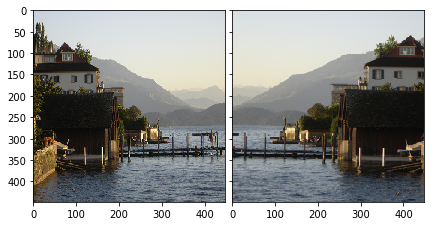

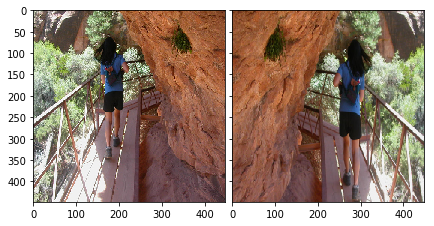

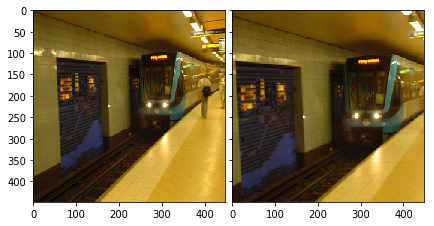

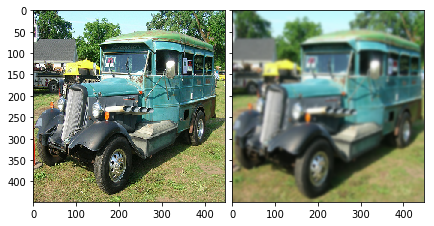

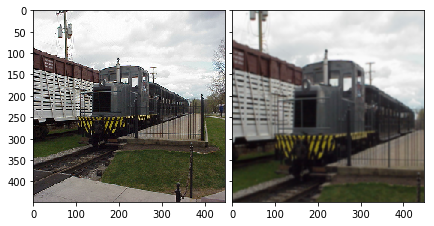

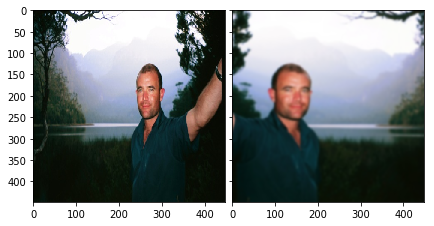

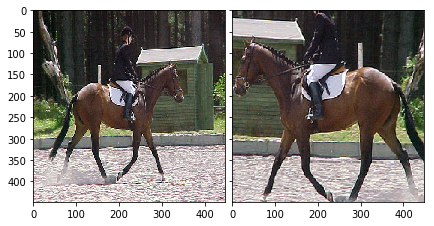

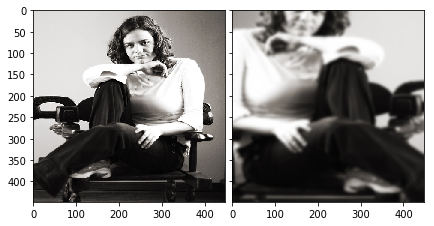

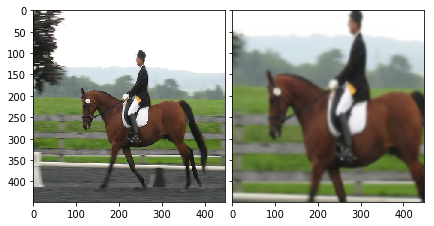

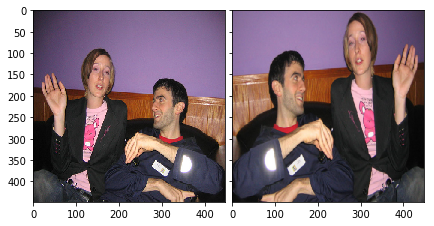

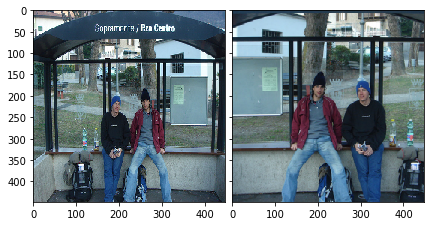

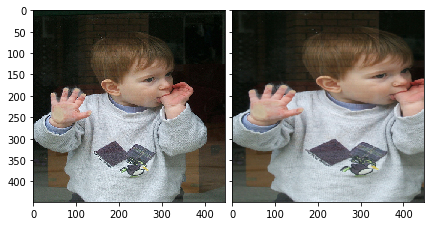

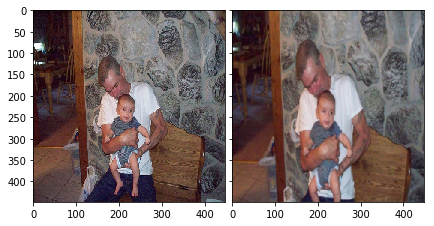

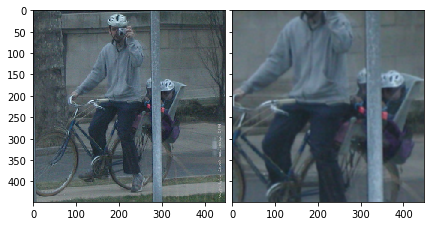

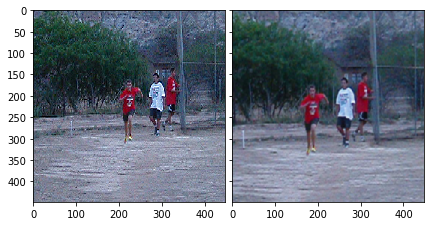

In [11]:
for idx in range(batch_size):
    fig = plt.figure(1, (7., 7.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,)  # pad between axes in inch.
    for i in range(2):
        grid[0].imshow(np.transpose(images[idx],(1,2,0)))
        grid[1].imshow(images_aug[idx])
        
    plt.show()

 